## LogisticRegression
---
- 인공신경망의 기본 개념과 동일
- Regression이지만 이진분류로 사용
- 선형모델 기반으로 y=wx+b 그대로 사용
- y=wx+b의 결과 => 분류 변환 함수 => softmax() -> multi

### 성적 -- 합격/불합격 분류 실습

In [1]:
# 사용 모듈 로딩
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

#### (1) 데이터 준비

In [11]:
x=[60, 62, 75, 82, 85, 94, 97, 99]  # 정수
y=[0,0,1,1,1,2,2,2]           

In [12]:
# 학습에 사용할 수 있도록 형변환
arrX= np.array(x).reshape(-1,1)
arrY= np.array(y)

In [13]:
# 데이터 체크
print('arrX:', arrX.shape, 'arrY:', arrY.shape)

arrX: (8, 1) arrY: (8,)


#### (2) 데이터 확인

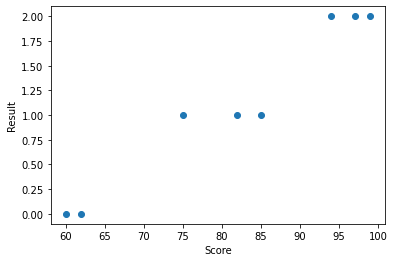

In [14]:
# 현재 데이터 시각화
plt.scatter(x,y)
plt.xlabel('Score')
plt.ylabel('Result')
plt.show()

### [3] 모델 생성 & 학습

In [15]:
model=LogisticRegression()

In [16]:
# 학습
model.fit(arrX, arrY)

LogisticRegression()

In [17]:
# 학습 후 설정된 속성
print('분류 종류:', model.classes_)
print('가중치 값:', model.coef_)
print('절편  값:', model.intercept_)
print('특성 갯수:', model.n_features_in_)

분류 종류: [0 1 2]
가중치 값: [[-0.55842313]
 [-0.0441321 ]
 [ 0.60255524]]
절편  값: [ 42.86856604   7.49596747 -50.36453351]
특성 갯수: 1


### [4] 평가 => score() 학습용 데이터 점수, 테스트용 데이터 점수
---
- 2개 점수 비교해서 과대적합, 과소적합 체크

In [15]:
model.score(arrX, arrY)

1.0

### [5] 테스트 => predict(): 새로운 데이터로 진행

In [16]:
preY=model.predict(arrX)

preY

array([0, 0, 1, 1, 1])

In [21]:
preY=model.predict([[87]])
preY

print('예측결과:', preY)

예측결과: [1]


In [23]:
probaY=model.predict_proba([[87]])

print('분류항목:', model.classes_)
print('예측확률:', probaY)

분류항목: [0 1]
예측확률: [[0.41114026 0.58885974]]


In [24]:
# 결정함수
model.decision_function([[82]])

array([-2.77600232])

In [25]:
# y=ax+b
model.coef_*82+model.intercept_

array([[-2.77600232]])

In [19]:
ret=model.decision_function([[87]])


In [20]:
# 시그모이드 함수 expit(ax+b) / 소프트맥스 함수 softmax(ax+b) 후 결과 확인
from scipy.special import softmax
sigValue2=softmax(ret)
print(np.round(sigValue2, 5))

[[7.0000e-05 8.3178e-01 1.6815e-01]]
